In [47]:
import numpy as np
import pandas as pd
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [48]:
data_cleaned = pd.read_csv('data/data_cleaned.csv')
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'], errors='coerce')
data_cleaned['End Date'] = pd.to_datetime(data_cleaned['End Date'], errors='coerce')
data_cleaned['Transaction Date (Pacific Time)'] = pd.to_datetime(data_cleaned['Transaction Date (Pacific Time)'], errors='coerce')
data_cleaned['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Total Duration (hh:mm:ss)'])
data_cleaned['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Charging Time (hh:mm:ss)'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169443 entries, 0 to 169442
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype          
---  ------                           --------------   -----          
 0   Station Name                     169443 non-null  object         
 1   MAC Address                      169443 non-null  object         
 2   Org Name                         169443 non-null  object         
 3   Start Date                       169443 non-null  datetime64[ns] 
 4   Start Time Zone                  169443 non-null  object         
 5   End Date                         169405 non-null  datetime64[ns] 
 6   End Time Zone                    169443 non-null  object         
 7   Transaction Date (Pacific Time)  169405 non-null  datetime64[ns] 
 8   Total Duration (hh:mm:ss)        169443 non-null  timedelta64[ns]
 9   Charging Time (hh:mm:ss)         169443 non-null  timedelta64[ns]
 10  Energy (kWh)                    

In [49]:
data_cleaned

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,0 days 01:27:58,0 days 01:25:26,...,-122.146065,USD,0.00,Plug Out at Vehicle,1665,94587.0,523487.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
1,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,0 days 04:56:27,0 days 02:31:04,...,-122.146065,USD,0.00,Plug Out at Vehicle,1771,95030.0,141845.0,Santa Clara County,1.428410e+11,CT4020-HD-GW
2,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,0 days 03:12:17,0 days 03:11:18,...,-122.146065,USD,0.00,Plug Out at Vehicle,1666,80525.0,203603.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
3,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,0 days 02:44:25,0 days 02:25:49,...,-122.159904,USD,0.00,Plug Out at Vehicle,2093,94539.0,126575.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
4,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,0 days 03:19:24,0 days 03:19:15,...,-122.162849,USD,0.00,Plug Out at Vehicle,3112,94024.0,191743.0,Santa Clara County,1.422410e+11,CT4020-HD-GW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169438,PALO ALTO CA / CAMBRIDGE #5,0024:B100:0002:9B7F,City of Palo Alto,2020-12-31 15:51:00,PST,2020-12-31 17:30:00,PST,2020-12-31 17:31:00,0 days 01:38:27,0 days 01:21:36,...,-122.145981,USD,0.58,Plug Out at Vehicle,4672,94303.0,2652881.0,Santa Clara County,1.742410e+11,CT4020-HD
169439,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,0 days 03:43:01,0 days 02:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661.0,Santa Clara County,1.336410e+11,CT4020-HD-GW
169440,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,0 days 17:28:14,0 days 05:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995.0,Santa Clara County,2.002410e+11,CT4010-HD-GW
169441,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,2020-12-31 21:56:00,0 days 04:05:34,0 days 03:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075.0,Santa Clara County,1.336410e+11,CT4020-HD-GW


[1] https://www.cityofpaloalto.org/City-Hall/Sustainability/Electric-Vehicles

## 1) Electric Vehicle STORY OF ONE CITY (PALO ALTO)

Palo Alto is located in the center of Silicon Valley, and has one of the highest EV adoption rates per capita, with **2500** residents currently owning EVs and another **1,000 EV** commuters coming into town each day. The city has taken multiple actions to accelerate EV adoption [1].

### Key Factors in Palo Alto's Success:

- City and state-level incentives that lower the cost of EVs up to **80,000 $**
- Solid charging network in the city center near large employers such as **Stanford, University South, and Tesla Motors.**
- A tech-savvy population 
- "Ride and drive" events to introduce residents to EVs, with a significant percentage of participants experiencing their first EV test drive.

### Our aim for further improvements
- Create a forecasting model to understand when there is largest amount of people charging
- Understand EV energy spending 
- Understand electricity generation in the city to further incentivise sustainability

#### A) Data Analysis

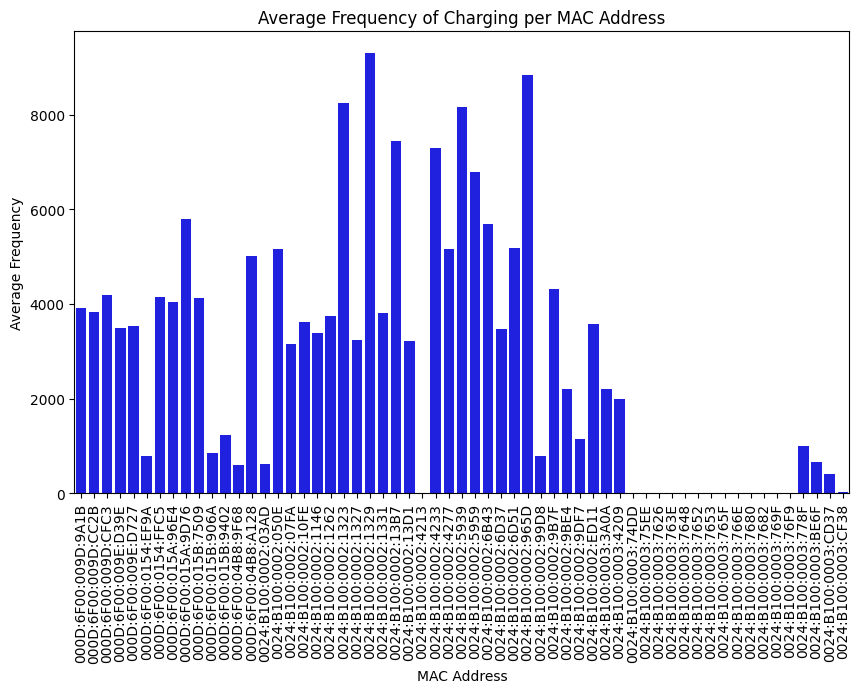

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average frequency of charging per MAC Address
average_frequency = data_cleaned.groupby('MAC Address').size()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart of the average frequencies
sns.barplot(x=average_frequency.index, y=average_frequency.values, color='blue')

plt.title('Average Frequency of Charging per MAC Address')
plt.xlabel('MAC Address')
plt.ylabel('Average Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [51]:
average_frequency

MAC Address
000D:6F00:009D:9A1B    3922
000D:6F00:009D:CC2B    3842
000D:6F00:009D:CFC3    4198
000D:6F00:009E:D39E    3497
000D:6F00:009E:D727    3526
000D:6F00:0154:EF9A     782
000D:6F00:0154:FFC5    4142
000D:6F00:015A:96E4    4033
000D:6F00:015A:9D76    5787
000D:6F00:015B:7509    4120
000D:6F00:015B:906A     855
000D:6F00:015B:9402    1228
000D:6F00:04B8:9F68     605
000D:6F00:04B8:A128    5014
0024:B100:0002:03AD     617
0024:B100:0002:050E    5164
0024:B100:0002:07FA    3161
0024:B100:0002:10FE    3615
0024:B100:0002:1146    3383
0024:B100:0002:1262    3754
0024:B100:0002:1323    8249
0024:B100:0002:1327    3237
0024:B100:0002:1329    9290
0024:B100:0002:1331    3819
0024:B100:0002:13B7    7435
0024:B100:0002:13D1    3212
0024:B100:0002:4213       3
0024:B100:0002:4233    7303
0024:B100:0002:4277    5172
0024:B100:0002:5939    8160
0024:B100:0002:5959    6778
0024:B100:0002:6B43    5693
0024:B100:0002:6D37    3467
0024:B100:0002:6D51    5182
0024:B100:0002:965D    8829
0024:B10

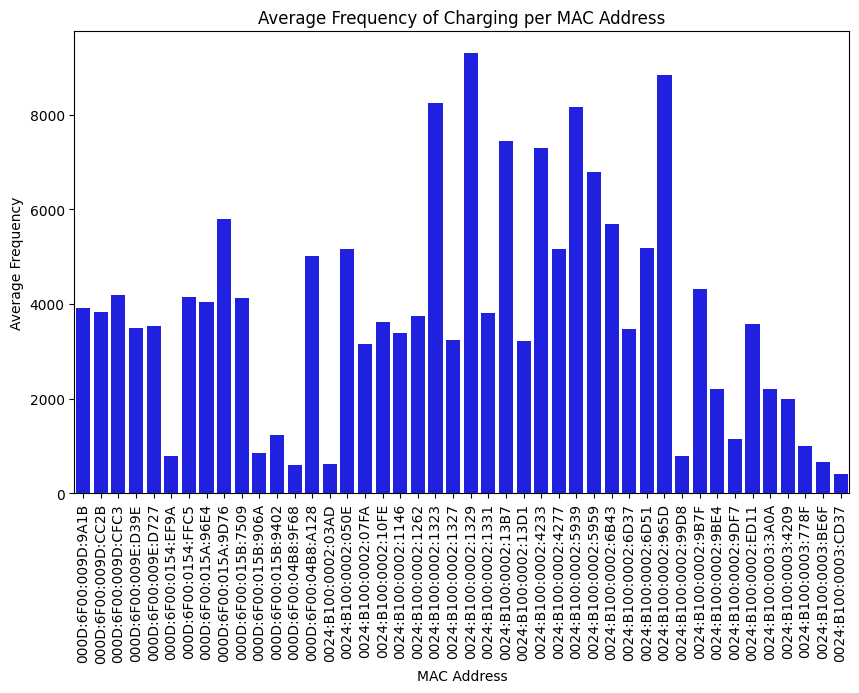

In [52]:
# Calculate the average frequency of charging per MAC Address
average_frequency = data_cleaned.groupby('MAC Address').size()

# Remove the stations with frequency = 0
average_frequency = average_frequency[average_frequency > 28]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart of the average frequencies
sns.barplot(x=average_frequency.index, y=average_frequency.values, color='blue')

plt.title('Average Frequency of Charging per MAC Address')
plt.xlabel('MAC Address')
plt.ylabel('Average Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

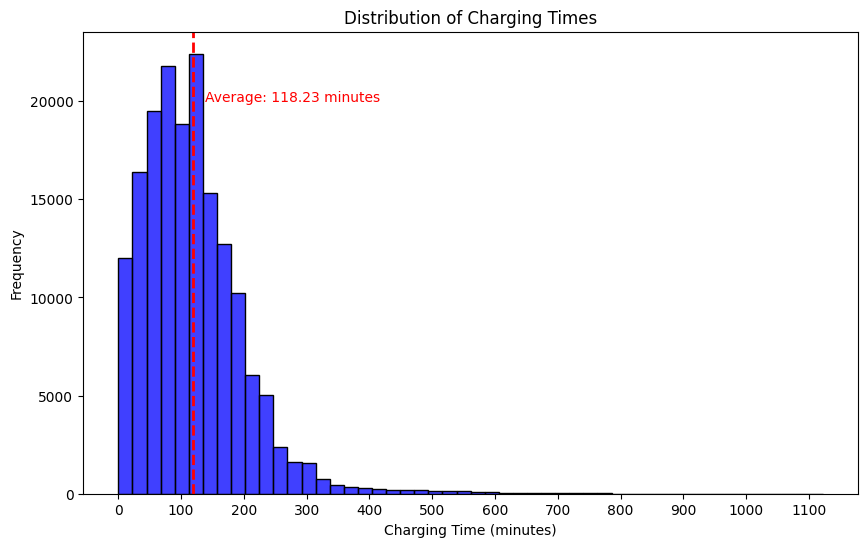

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_cleaned = data_cleaned[data_cleaned['MAC Address'].isin(average_frequency.index)]
charging_time_minutes = data_cleaned['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram of charging times
sns.histplot(charging_time_minutes, bins=50, color='blue')

# Calculate the average charging time
average_charging_time = charging_time_minutes.mean()

# Add a vertical line at the average charging time
plt.axvline(average_charging_time, color='red', linestyle='dashed', linewidth=2)

# Print the average charging time on the plot
plt.text(average_charging_time+20, 20000, 'Average: {:.2f} minutes'.format(average_charging_time), color='red')

# Set the x-axis ticks
plt.xticks(np.arange(0, charging_time_minutes.max(), 100))

plt.title('Distribution of Charging Times')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [54]:
import numpy as np
from scipy.stats import wasserstein_distance

# Convert 'Charging Time (hh:mm:ss)' to total number of minutes
data_cleaned['Charging Time (minutes)'] = data_cleaned['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60

# Get the unique MAC Addresses
mac_addresses = data_cleaned['MAC Address'].unique()

# Create a distribution for the average charging time
average_distribution = data_cleaned['Charging Time (minutes)']

# Create a dictionary to store the values
values_dict = {}

# Loop over the unique MAC Addresses
for mac_address in mac_addresses:
    # Filter the data for the current MAC Address
    data_filtered = data_cleaned[data_cleaned['MAC Address'] == mac_address]
    
    # Calculate the average charging time
    average_charging_time = data_filtered['Charging Time (minutes)'].mean()
    
    # Calculate the Wasserstein distance between the distribution for the current MAC Address and the average distribution
    w_dist = wasserstein_distance(data_filtered['Charging Time (minutes)'], average_distribution)
    
    # Save the values into the dictionary
    values_dict[mac_address] = (average_charging_time, w_dist)

# Find the MAC Address with the most similar distribution (minimum Wasserstein distance)
most_similar_mac_address = min(values_dict, key=lambda x: values_dict[x][1])

# Find the MAC Address with the most distant distribution (maximum Wasserstein distance)
most_distant_mac_address = max(values_dict, key=lambda x: values_dict[x][1])

# Sort the dictionary by the Wasserstein distance
sorted_values = sorted(values_dict.items(), key=lambda x: x[1][1])

# Find the MAC Address with the median Wasserstein distance
median_mac_address = sorted_values[len(sorted_values) // 2][0]

print('Median Distribution: MAC Address: {}, Average Charging Time: {:.2f} minutes, Wasserstein Distance to Average Distribution: {:.2f}'.format(median_mac_address, *values_dict[median_mac_address]))
print('Most Similar Distribution: MAC Address: {}, Average Charging Time: {:.2f} minutes, Wasserstein Distance to Average Distribution: {:.2f}'.format(most_similar_mac_address, *values_dict[most_similar_mac_address]))
print('Most Distant Distribution: MAC Address: {}, Average Charging Time: {:.2f} minutes, Wasserstein Distance to Average Distribution: {:.2f}'.format(most_distant_mac_address, *values_dict[most_distant_mac_address]))

Median Distribution: MAC Address: 0024:B100:0002:03AD, Average Charging Time: 108.70 minutes, Wasserstein Distance to Average Distribution: 9.72
Most Similar Distribution: MAC Address: 0024:B100:0002:5959, Average Charging Time: 115.87 minutes, Wasserstein Distance to Average Distribution: 3.22
Most Distant Distribution: MAC Address: 0024:B100:0003:3A0A, Average Charging Time: 90.33 minutes, Wasserstein Distance to Average Distribution: 27.90


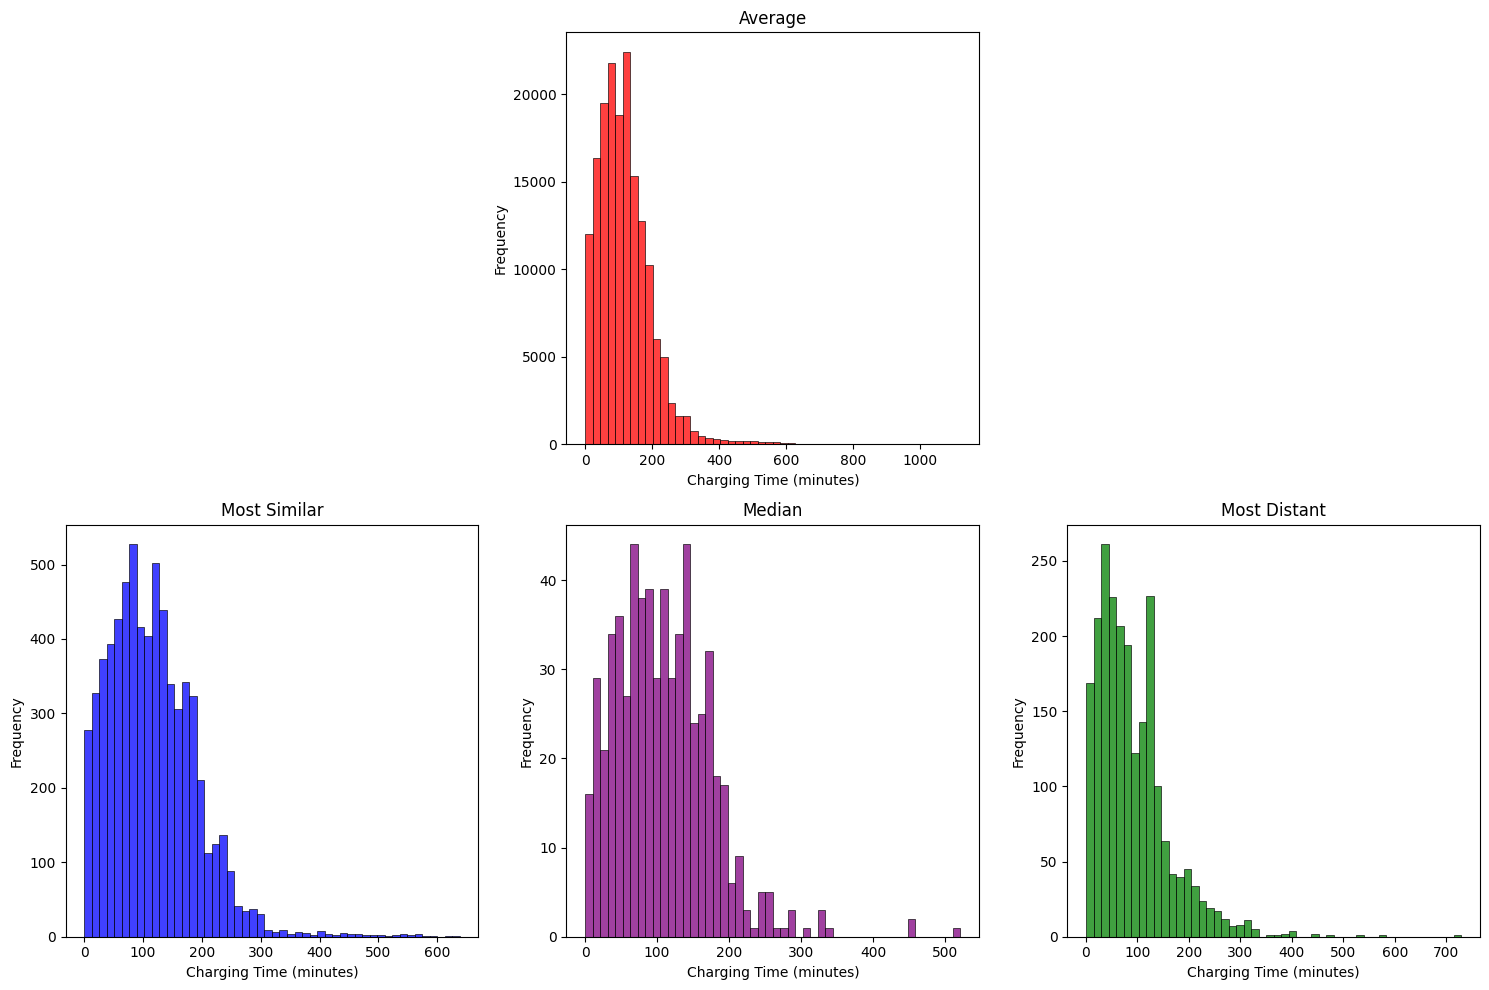

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the most similar MAC Address
data_similar = data_cleaned[data_cleaned['MAC Address'] == most_similar_mac_address]

# Filter the data for the most distant MAC Address
data_distant = data_cleaned[data_cleaned['MAC Address'] == most_distant_mac_address]

# Filter the data for the median MAC Address
data_median = data_cleaned[data_cleaned['MAC Address'] == median_mac_address]

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a histogram of charging times for the average distribution
plt.subplot(2, 3, 2)
sns.histplot(average_distribution, bins=50, color='red')
plt.title('Average')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')

# Create a histogram of charging times for the most similar MAC Address
plt.subplot(2, 3, 4)
sns.histplot(data_similar['Charging Time (minutes)'], bins=50, color='blue')
plt.title('Most Similar')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')

# Create a histogram of charging times for the median MAC Address
plt.subplot(2, 3, 5)
sns.histplot(data_median['Charging Time (minutes)'], bins=50, color='purple')
plt.title('Median')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')

# Create a histogram of charging times for the most distant MAC Address
plt.subplot(2, 3, 6)
sns.histplot(data_distant['Charging Time (minutes)'], bins=50, color='green')
plt.title('Most Distant')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [56]:
import folium

# Find unique combinations of 'MAC Address', 'Latitude', and 'Longitude'
unique_locations = data_cleaned[['MAC Address', 'Latitude', 'Longitude']].drop_duplicates()

print("Unique EV Charging locations in the city: ", len(unique_locations))

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[data_cleaned['Latitude'].mean(), data_cleaned['Longitude'].mean()], zoom_start=13)

# Add a marker for each unique charger location
for idx, row in unique_locations.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['MAC Address']).add_to(m)

# Display the map
m

Unique EV Charging locations in the city:  49


In [57]:
data_cleaned

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Charging Time (minutes)
0,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,0 days 01:27:58,0 days 01:25:26,...,USD,0.00,Plug Out at Vehicle,1665,94587.0,523487.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,85.433333
1,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,0 days 04:56:27,0 days 02:31:04,...,USD,0.00,Plug Out at Vehicle,1771,95030.0,141845.0,Santa Clara County,1.428410e+11,CT4020-HD-GW,151.066667
2,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,0 days 03:12:17,0 days 03:11:18,...,USD,0.00,Plug Out at Vehicle,1666,80525.0,203603.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,191.300000
3,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,0 days 02:44:25,0 days 02:25:49,...,USD,0.00,Plug Out at Vehicle,2093,94539.0,126575.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,145.816667
4,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,0 days 03:19:24,0 days 03:19:15,...,USD,0.00,Plug Out at Vehicle,3112,94024.0,191743.0,Santa Clara County,1.422410e+11,CT4020-HD-GW,199.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169438,PALO ALTO CA / CAMBRIDGE #5,0024:B100:0002:9B7F,City of Palo Alto,2020-12-31 15:51:00,PST,2020-12-31 17:30:00,PST,2020-12-31 17:31:00,0 days 01:38:27,0 days 01:21:36,...,USD,0.58,Plug Out at Vehicle,4672,94303.0,2652881.0,Santa Clara County,1.742410e+11,CT4020-HD,81.600000
169439,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,0 days 03:43:01,0 days 02:14:04,...,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661.0,Santa Clara County,1.336410e+11,CT4020-HD-GW,134.066667
169440,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,0 days 17:28:14,0 days 05:08:12,...,USD,6.82,Plug Out at Vehicle,455,94306.0,449995.0,Santa Clara County,2.002410e+11,CT4010-HD-GW,308.200000
169441,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,2020-12-31 21:56:00,0 days 04:05:34,0 days 03:53:42,...,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075.0,Santa Clara County,1.336410e+11,CT4020-HD-GW,233.700000


## Time-series FORECASTING with PROPHET 

In [58]:
data_cleaned.head(5)

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Charging Time (minutes)
0,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,0 days 01:27:58,0 days 01:25:26,...,USD,0.0,Plug Out at Vehicle,1665,94587.0,523487.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,85.433333
1,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,0 days 04:56:27,0 days 02:31:04,...,USD,0.0,Plug Out at Vehicle,1771,95030.0,141845.0,Santa Clara County,1.428410e+11,CT4020-HD-GW,151.066667
2,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,0 days 03:12:17,0 days 03:11:18,...,USD,0.0,Plug Out at Vehicle,1666,80525.0,203603.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,191.300000
3,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,0 days 02:44:25,0 days 02:25:49,...,USD,0.0,Plug Out at Vehicle,2093,94539.0,126575.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,145.816667
4,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,0 days 03:19:24,0 days 03:19:15,...,USD,0.0,Plug Out at Vehicle,3112,94024.0,191743.0,Santa Clara County,1.422410e+11,CT4020-HD-GW,199.250000


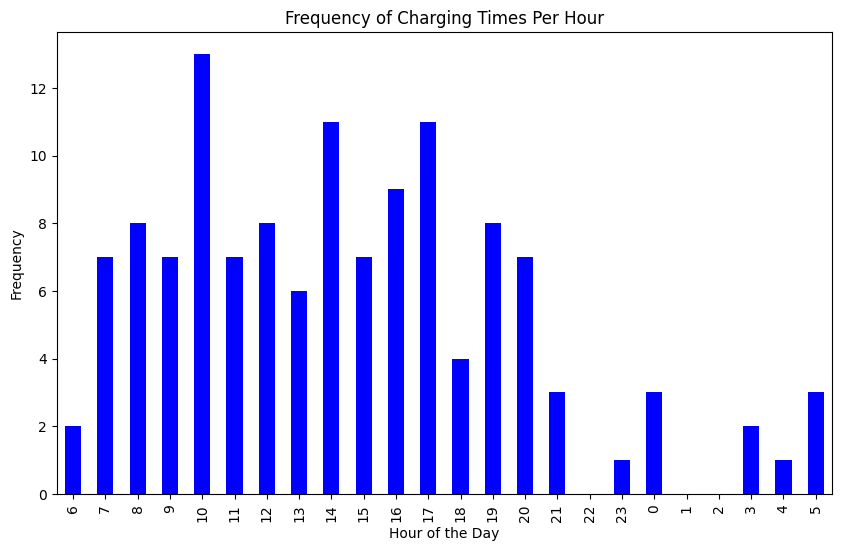

In [59]:
import matplotlib.pyplot as plt

# Convert 'Start Date' to datetime if it is not already
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'])

# Create a new column "Start Date Year" that contains only the date part of 'Start Date'
data_cleaned['Start Date Year'] = data_cleaned['Start Date'].dt.date
data_cleaned['Start Date Time'] = data_cleaned['Start Date'].dt.time
data_cleaned['End Date Time'] = data_cleaned['End Date'].dt.time

# Filter the data from 6am on the 1st until 5am on the 2nd
data_filtered = data_cleaned[((data_cleaned['Start Date Year'] == pd.to_datetime('2016-10-09').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) >= 6)) | 
                             ((data_cleaned['Start Date Year'] == pd.to_datetime('2016-10-10').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 6))]

# Extract the hour from 'Start Date Time' and 'End Date Time'
data_filtered['Start Hour'] = data_filtered['Start Date Time'].apply(lambda x: x.hour)
data_filtered['End Hour'] = data_filtered['End Date Time'].apply(lambda x: x.hour)

# Calculate the frequency of each hour
hour_frequency = data_filtered['Start Hour'].value_counts().sort_index()

# Reorder the hour_frequency Series to start from 6 in the morning until 5 am next day
hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)))

# Create a bar chart of the hour frequencies
plt.figure(figsize=(10, 6))
hour_frequency.plot.bar(color='blue')

plt.title('Frequency of Charging Times Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

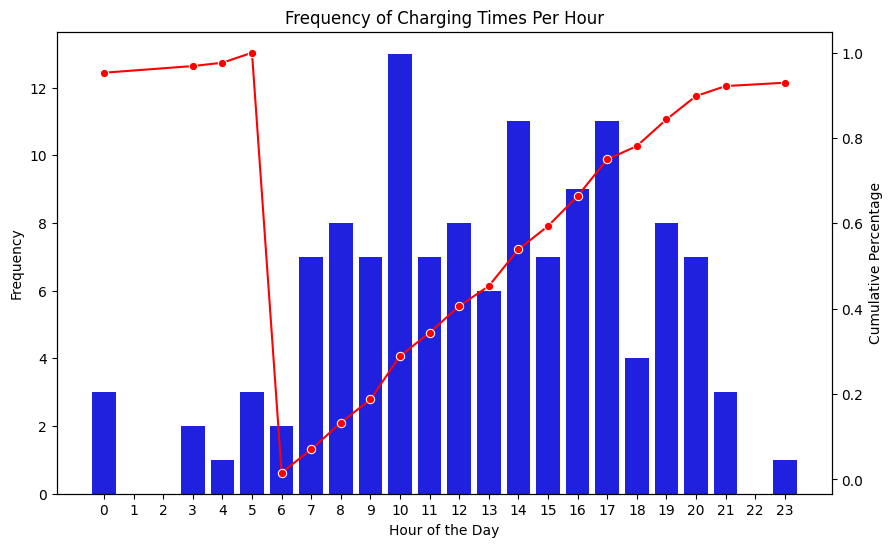

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Start Date' to datetime if it is not already
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'])

# Create a new column "Start Date Year" that contains only the date part of 'Start Date'
data_cleaned['Start Date Year'] = data_cleaned['Start Date'].dt.date
data_cleaned['Start Date Time'] = data_cleaned['Start Date'].dt.time
data_cleaned['End Date Time'] = data_cleaned['End Date'].dt.time

# Filter the data from 6am on the 1st until 5am on the 2nd
data_filtered = data_cleaned[((data_cleaned['Start Date Year'] == pd.to_datetime('2016-10-09').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) >= 6)) | 
                             ((data_cleaned['Start Date Year'] == pd.to_datetime('2016-10-10').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 6))]

# Extract the hour from 'Start Date Time' and 'End Date Time'
data_filtered['Start Hour'] = data_filtered['Start Date Time'].apply(lambda x: x.hour)
data_filtered['End Hour'] = data_filtered['End Date Time'].apply(lambda x: x.hour)

# Calculate the frequency of each hour
hour_frequency = data_filtered['Start Hour'].value_counts().sort_index()

# Reorder the hour_frequency Series to start from 6 in the morning until 5 am next day
hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)))

# Calculate the cumulative percentage
cumulative_percentage = hour_frequency.cumsum() / hour_frequency.sum()

# Create a bar chart of the hour frequencies
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=hour_frequency.index, y=hour_frequency.values, color='blue', ax=ax1)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=cumulative_percentage.index, y=cumulative_percentage.values, color='red', marker='o', ax=ax2)

ax1.set_title('Frequency of Charging Times Per Hour')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Percentage')
plt.show()

In [61]:
print(((data_cleaned['Start Date Year'] == pd.to_datetime('2016-08-02').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 6)).sum())

5


In [62]:
print(data_cleaned[data_cleaned['Start Date Year'] == pd.to_datetime('2016-08-03').date()])

                       Station Name          MAC Address            Org Name  \
279           PALO ALTO CA / MPL #6  000D:6F00:015B:7509  City of Palo Alto    
280      PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto    
281  PALO ALTO CA / TED THOMPSON #1  0024:B100:0002:1323  City of Palo Alto    
282     PALO ALTO CA / CAMBRIDGE #1  0024:B100:0002:1329  City of Palo Alto    
283      PALO ALTO CA / HAMILTON #2  0024:B100:0002:1331  City of Palo Alto    
..                              ...                  ...                 ...   
419      PALO ALTO CA / HAMILTON #2  0024:B100:0002:1331  City of Palo Alto    
420        PALO ALTO CA / BRYANT #2  000D:6F00:009D:CFC3  City of Palo Alto    
421  PALO ALTO CA / RINCONADA LIB 3  000D:6F00:015A:96E4  City of Palo Alto    
422      PALO ALTO CA / HAMILTON #2  0024:B100:0002:1331  City of Palo Alto    
423  PALO ALTO CA / RINCONADA LIB 2  000D:6F00:009E:D727  City of Palo Alto    

             Start Date Start Time Zone

In [63]:
print(data_cleaned[(data_cleaned['Start Date Year'] == pd.to_datetime('2016-08-03').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 6)])

                       Station Name          MAC Address            Org Name  \
279           PALO ALTO CA / MPL #6  000D:6F00:015B:7509  City of Palo Alto    
280      PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto    
281  PALO ALTO CA / TED THOMPSON #1  0024:B100:0002:1323  City of Palo Alto    
282     PALO ALTO CA / CAMBRIDGE #1  0024:B100:0002:1329  City of Palo Alto    

             Start Date Start Time Zone            End Date End Time Zone  \
279 2016-08-03 00:20:00             PDT 2016-08-03 00:30:00           PDT   
280 2016-08-03 00:52:00             PDT 2016-08-03 08:38:00           PDT   
281 2016-08-03 04:17:00             PDT 2016-08-03 07:59:00           PDT   
282 2016-08-03 05:18:00             PDT 2016-08-03 06:54:00           PDT   

    Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
279             2016-08-03 00:30:00           0 days 00:10:43   
280             2016-08-03 08:38:00           0 days 07:45:55   
281             20

In [64]:
filtered_data = data_cleaned[data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 5]
grouped_data = filtered_data.groupby('Start Date Year')
large_groups = grouped_data.filter(lambda x: len(x) > 5)
print(large_groups['Start Date Year'].unique())

[datetime.date(2016, 10, 10) datetime.date(2017, 1, 14)
 datetime.date(2017, 12, 14)]


Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        0,  1,  2,  3,  4,  5],
      dtype='int64', name='Start Hour')


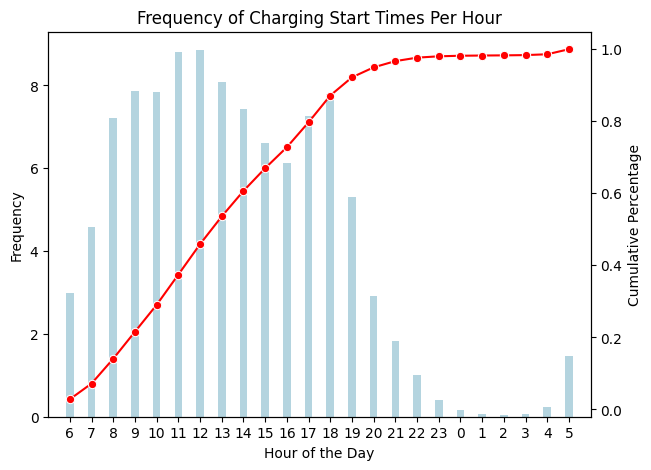

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Start Date' to datetime if it is not already
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'])
data_cleaned['End Date'] = pd.to_datetime(data_cleaned['End Date'])


# Create a new column "Start Date Year" that contains only the date part of 'Start Date'
data_cleaned['Start Date Year'] = data_cleaned['Start Date'].dt.date
data_cleaned['Start Date Time'] = data_cleaned['Start Date'].dt.time
data_cleaned['End Date Time'] = data_cleaned['End Date'].dt.time

data_cleaned['End Hour'] = data_cleaned['End Date'].dt.hour
data_cleaned['Start Hour'] = data_cleaned['Start Date'].dt.hour

data_filtered = data_cleaned[((data_cleaned['Start Hour'] >= 6)) | 
                             ((data_cleaned['Start Hour'] < 6))]

# Group by 'Start Hour' and calculate the average frequency for each hour
hour_frequency = data_filtered.groupby('Start Hour').size().div(len(data_cleaned['Start Date'].dt.date.unique()))

#
# Reorder the hour_frequency Series to start from 6 in the morning until 5 am next day
hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)), fill_value=0)

# Calculate the cumulative percentage
cumulative_percentage = hour_frequency.cumsum() / hour_frequency.sum()

#print(cumulative_percentage)
#print(hour_frequency)

# Create a bar chart of the hour frequencies
fig, ax1 = plt.subplots(figsize=(7,5))
sns.barplot(x=hour_frequency.index.astype(str), y=hour_frequency.values, color='lightblue', ax=ax1, width=0.35)
print(hour_frequency.index)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=cumulative_percentage.index.astype(str), y=cumulative_percentage.values, color='red', marker='o', ax=ax2)

ax1.set_title('Frequency of Charging Start Times Per Hour')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Percentage')

# Set the x-axis limits
ax1.set_xlim(-1, 24)
# Tilt the x-axis bar ticks
plt.xticks(rotation=45, ha='right')

plt.show()

In [66]:
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number', 'Charging Time (minutes)',
       'Start Date Year', 'Start Date Time', 'End Date Time', 'End Hour',
       'Start Hour'],
      dtype='object')

In [67]:
data_cleaned

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,User ID,County,System S/N,Model Number,Charging Time (minutes),Start Date Year,Start Date Time,End Date Time,End Hour,Start Hour
0,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,0 days 01:27:58,0 days 01:25:26,...,523487.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,85.433333,2016-08-01,05:21:00,06:49:00,6.0,5
1,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,0 days 04:56:27,0 days 02:31:04,...,141845.0,Santa Clara County,1.428410e+11,CT4020-HD-GW,151.066667,2016-08-01,06:01:00,10:58:00,10.0,6
2,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,0 days 03:12:17,0 days 03:11:18,...,203603.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,191.300000,2016-08-01,06:03:00,09:15:00,9.0,6
3,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,0 days 02:44:25,0 days 02:25:49,...,126575.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,145.816667,2016-08-01,06:10:00,08:54:00,8.0,6
4,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,0 days 03:19:24,0 days 03:19:15,...,191743.0,Santa Clara County,1.422410e+11,CT4020-HD-GW,199.250000,2016-08-01,06:13:00,09:33:00,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169438,PALO ALTO CA / CAMBRIDGE #5,0024:B100:0002:9B7F,City of Palo Alto,2020-12-31 15:51:00,PST,2020-12-31 17:30:00,PST,2020-12-31 17:31:00,0 days 01:38:27,0 days 01:21:36,...,2652881.0,Santa Clara County,1.742410e+11,CT4020-HD,81.600000,2020-12-31,15:51:00,17:30:00,17.0,15
169439,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,0 days 03:43:01,0 days 02:14:04,...,242661.0,Santa Clara County,1.336410e+11,CT4020-HD-GW,134.066667,2020-12-31,16:48:00,20:31:00,20.0,16
169440,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,0 days 17:28:14,0 days 05:08:12,...,449995.0,Santa Clara County,2.002410e+11,CT4010-HD-GW,308.200000,2020-12-31,17:28:00,10:56:00,10.0,17
169441,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,2020-12-31 21:56:00,0 days 04:05:34,0 days 03:53:42,...,804075.0,Santa Clara County,1.336410e+11,CT4020-HD-GW,233.700000,2020-12-31,17:49:00,21:55:00,21.0,17


Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        0,  1,  2,  3,  4,  5],
      dtype='int64', name='End Hour')


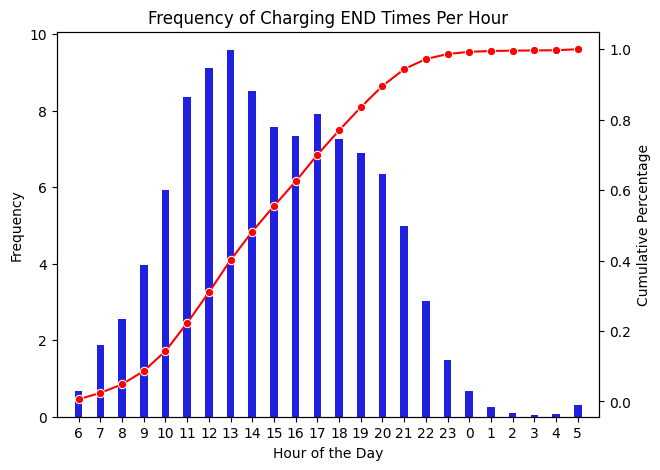

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


data_filtered = data_cleaned[((data_cleaned['End Hour'] >= 6)) | 
                             ((data_cleaned['End Hour'] < 6))]

# Group by 'Start Hour' and calculate the average frequency for each hour
hour_frequency = data_filtered.groupby('End Hour').size().div(len(data_cleaned['End Date'].dt.date.unique()))

#
# Reorder the hour_frequency Series to start from 6 in the morning until 5 am next day
hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)), fill_value=0)

# Calculate the cumulative percentage
cumulative_percentage = hour_frequency.cumsum() / hour_frequency.sum()

#print(cumulative_percentage)
#print(hour_frequency)

# Create a bar chart of the hour frequencies
fig, ax1 = plt.subplots(figsize=(7,5))
sns.barplot(x=hour_frequency.index.astype(str), y=hour_frequency.values, color='blue', ax=ax1, width=0.35)
print(hour_frequency.index)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=cumulative_percentage.index.astype(str), y=cumulative_percentage.values, color='red', marker='o', ax=ax2)

ax1.set_title('Frequency of Charging END Times Per Hour')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Percentage')

# Set the x-axis limits
ax1.set_xlim(-1, 24)
# Tilt the x-axis bar ticks
plt.xticks(rotation=45, ha='right')

plt.show()

In [69]:
data_filtered["User ID"]
unique_user_ids = data_filtered["User ID"].unique()
print(len(unique_user_ids))

17677


In [70]:
import pandas as pd

# Group by 'User ID' and calculate the sum of 'Energy (kWh)' and 'Gasoline Savings (gallons)'
sums = data_cleaned.groupby('User ID')[['Energy (kWh)', 'Gasoline Savings (gallons)', 'GHG Savings (kg)', 'Fee']].sum()

# Convert 'Total Duration (hh:mm:ss)' to timedelta and calculate the mean
data_cleaned['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Total Duration (hh:mm:ss)'])
means = data_cleaned.groupby('User ID')['Total Duration (hh:mm:ss)'].mean()

# Combine the results
result = pd.concat([sums, means], axis=1)
result_sorted = result.sort_values(by=['Energy (kWh)', 'Gasoline Savings (gallons)', 'Total Duration (hh:mm:ss)'],  ascending=False)
print(result_sorted)

           Energy (kWh)  Gasoline Savings (gallons)  GHG Savings (kg)  \
User ID                                                                 
561893.0   10224.360801                    1283.165          4294.230   
143839.0    9110.168883                    1143.332          3826.280   
485553.0    7888.434316                     989.998          3313.144   
599257.0    7733.271253                     970.522          3247.974   
453469.0    7519.080852                     943.653          3158.011   
...                 ...                         ...               ...   
406621.0       0.013000                       0.002             0.005   
204351.0       0.010000                       0.001             0.004   
398507.0       0.010000                       0.001             0.004   
2033521.0      0.010000                       0.001             0.004   
7550.0         0.010000                       0.001             0.004   

               Fee Total Duration (hh:mm:ss)  
Use

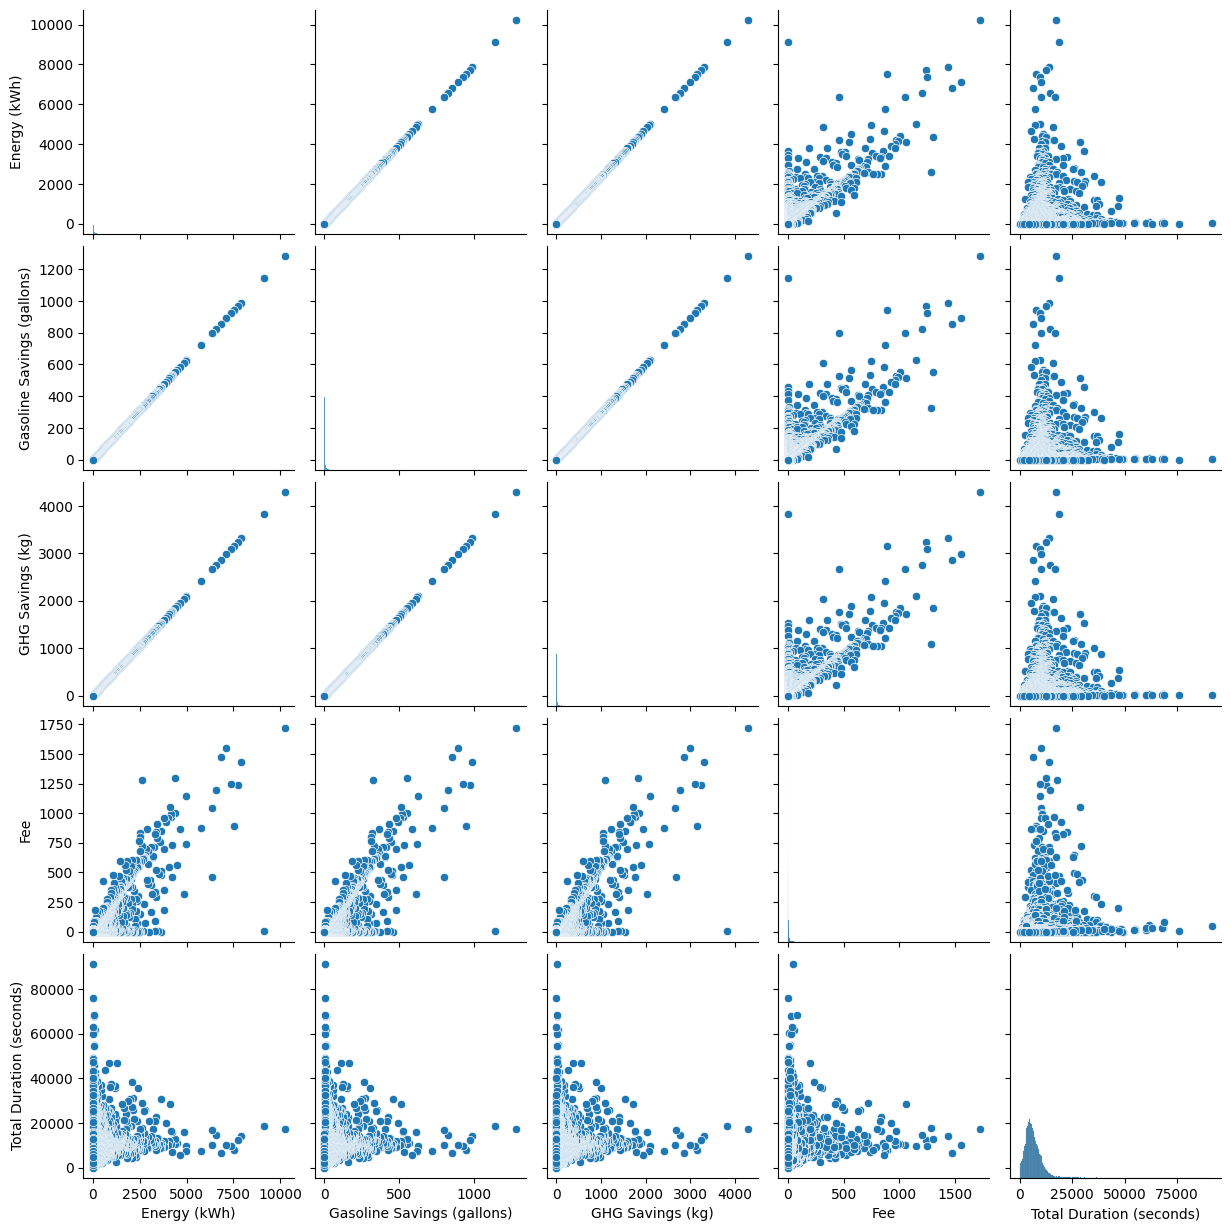

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Total Duration (hh:mm:ss)' to seconds for better visualization
result_sorted['Total Duration (seconds)'] = result_sorted['Total Duration (hh:mm:ss)'].dt.total_seconds()

# Create the pairplot
sns.pairplot(result_sorted)
plt.show()

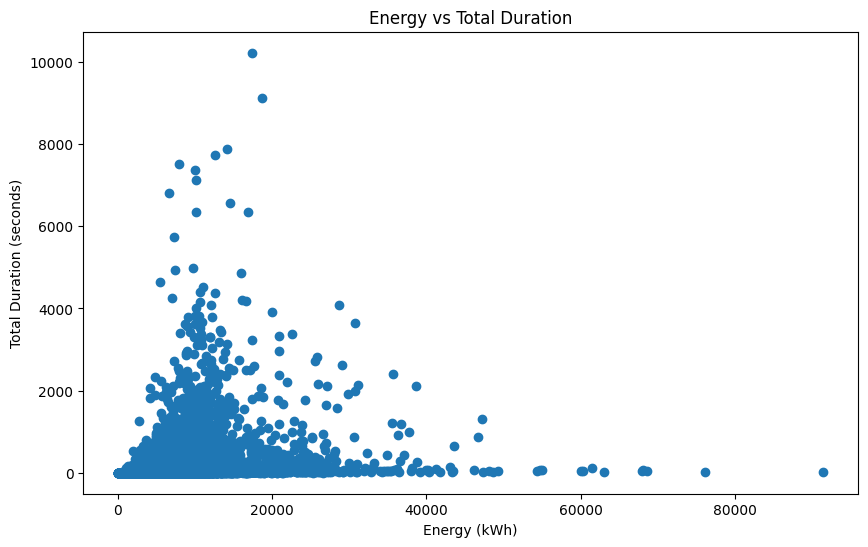

In [72]:
import matplotlib.pyplot as plt

# Convert 'Total Duration (hh:mm:ss)' to seconds for better visualization
result_sorted['Total Duration (seconds)'] = result_sorted['Total Duration (hh:mm:ss)'].dt.total_seconds()

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(result_sorted['Total Duration (seconds)'], result_sorted['Energy (kWh)'])
plt.xlabel('Energy (kWh)')
plt.ylabel('Total Duration (seconds)')
plt.title('Energy vs Total Duration')
plt.show()

In [73]:
# Get the index of the row with the highest 'Total Duration (hh:mm:ss)'
index_max_duration = result_sorted['Total Duration (hh:mm:ss)'].idxmax()

# Get the row with the highest 'Total Duration (hh:mm:ss)'
row_max_duration = result_sorted.loc[index_max_duration]
print(row_max_duration)

Energy (kWh)                           17.397
Gasoline Savings (gallons)              2.183
GHG Savings (kg)                        7.307
Fee                                     46.96
Total Duration (hh:mm:ss)     1 days 01:23:57
Total Duration (seconds)              91437.0
Name: 1920451.0, dtype: object


In [74]:
# Get the index of the row with the highest 'Energy (kWh)'
index_max_energy = data_cleaned['Energy (kWh)'].idxmax()

# Get the row with the highest 'Energy (kWh)'
row_max_energy = data_cleaned.loc[index_max_energy]
print(row_max_energy)

Station Name                       PALO ALTO CA / HAMILTON #1
MAC Address                               000D:6F00:015A:9D76
Org Name                                   City of Palo Alto 
Start Date                                2019-03-14 15:37:00
Start Time Zone                                           PDT
End Date                                  2019-03-15 11:09:00
End Time Zone                                             PDT
Transaction Date (Pacific Time)           2019-03-15 11:10:00
Total Duration (hh:mm:ss)                     0 days 19:31:53
Charging Time (hh:mm:ss)                      0 days 17:56:41
Energy (kWh)                                            97.36
GHG Savings (kg)                                       40.891
Gasoline Savings (gallons)                             12.219
Port Type                                             Level 2
Port Number                                                 2
Plug Type                                               J1772
EVSE ID 

In [75]:
import numpy as np

# Calculate and print the average fee
average_fee = data_cleaned['Fee'].mean()
print(f"Average Fee: {average_fee}")
sample_data = data_cleaned.sample(frac=0.25)


Average Fee: 1.5360746251033184


In [89]:
sample_data.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number', 'Charging Time (minutes)',
       'Start Date Year', 'Start Date Time', 'End Date Time', 'End Hour',
       'Start Hour'],
      dtype='object')

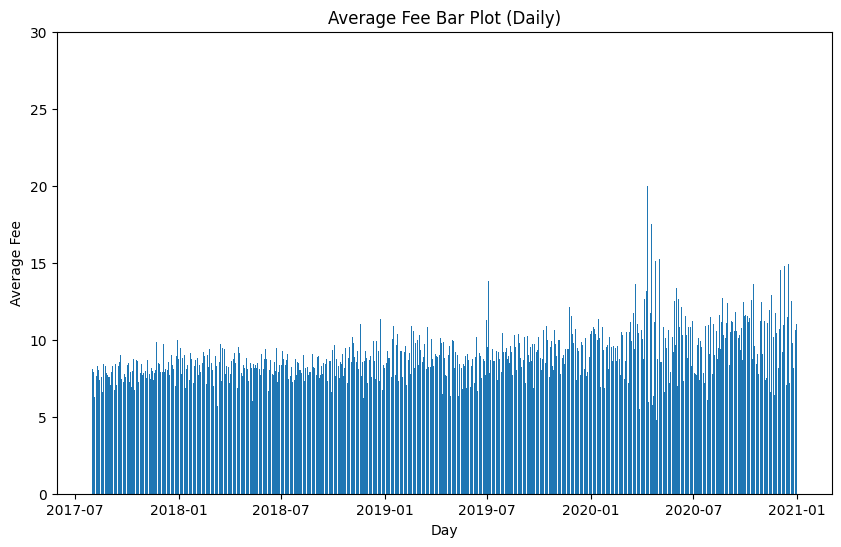

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Start Date' is in datetime format and set it as the index
# data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'])
# data_cleaned.set_index('Start Date', inplace=True)


# Create a boolean mask for dates starting from August 2017
mask = (data_cleaned.index >= '2017-08-01')

# Apply the mask to the DataFrame and resample the data by day
daily_data = data_cleaned.loc[mask, 'Energy (kWh)'].resample('D').mean()
#daily_data = data_cleaned['Fee'].resample('D').mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(daily_data.index, daily_data)
plt.xlabel('Day')
plt.ylabel('Average Fee')
plt.title('Average Fee Bar Plot (Daily)')
plt.ylim(0, 30)  # Set y-axis limit to 30
plt.show()

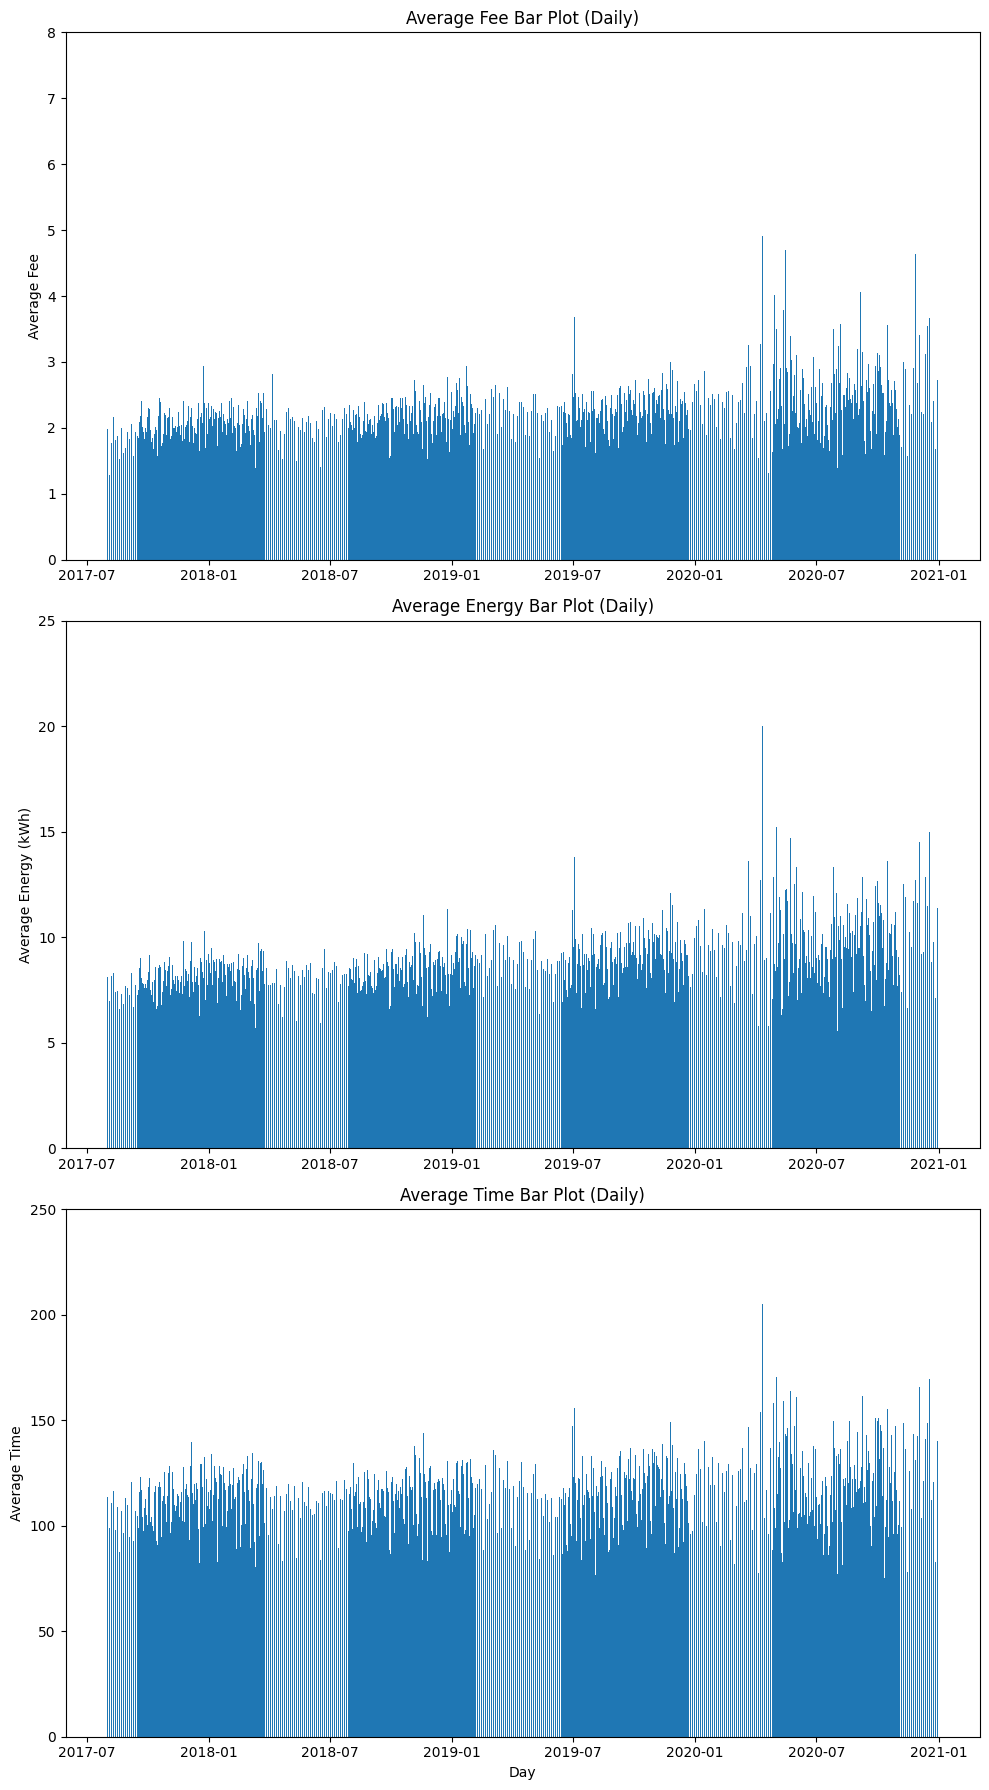

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a boolean mask for dates starting from August 2017
mask = (data_cleaned.index >= '2017-08-01')

# Apply the mask to the DataFrame and resample each column by day
daily_fee = data_cleaned.loc[mask, 'Fee'].resample('D').mean()
daily_energy = data_cleaned.loc[mask, 'Energy (kWh)'].resample('D').mean()
daily_time = data_cleaned.loc[mask, 'Charging Time (minutes)'].resample('D').mean()

# Create the subplots
fig, axs = plt.subplots(3, figsize=(10, 18))

# Plot the average fee
axs[0].bar(daily_fee.index, daily_fee)
axs[0].set_ylabel('Average Fee')
axs[0].set_title('Average Fee Bar Plot (Daily)')
axs[0].set_ylim(0, 8)  # Set y-axis limit to 30

# Plot the average energy
axs[1].bar(daily_energy.index, daily_energy)
axs[1].set_ylabel('Average Energy (kWh)')
axs[1].set_title('Average Energy Bar Plot (Daily)')
axs[1].set_ylim(0, 25)  # Set y-axis limit to 30

# Plot the average time
axs[2].bar(daily_time.index, daily_time)
axs[2].set_xlabel('Day')
axs[2].set_ylabel('Average Time')
axs[2].set_title('Average Time Bar Plot (Daily)')
axs[2].set_ylim(0, 250)  # Set y-axis limit to 30

# Show the plots
plt.tight_layout()
plt.show()

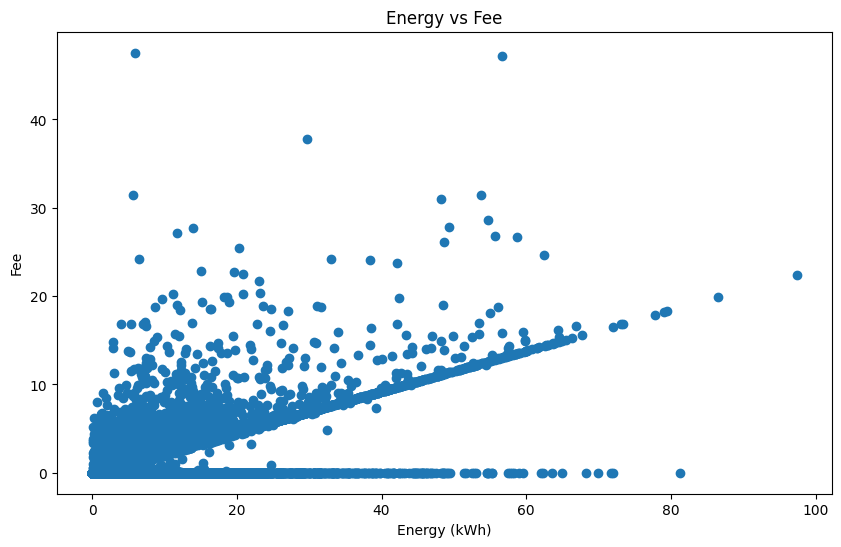

In [79]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['Energy (kWh)'], sample_data['Fee'])
plt.xlabel('Energy (kWh)')
plt.ylabel('Fee')
plt.title('Energy vs Fee')
plt.show()

In [112]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Create a new DataFrame with 'Energy (kWh)' and 'Charging Time (minutes)' as features and 'Fee' as the target
data_ml = data_cleaned[['Energy (kWh)', 'Charging Time (minutes)', 'Fee']].dropna()

# Define the features and the target
X = data_ml[['Energy (kWh)', 'Charging Time (minutes)']]
y = data_ml['Fee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN Regressor
model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to predict the 'Fee' for the testing data
y_pred = model.predict(X_test)

4235/4235 [==============================] - 1s 275us/step


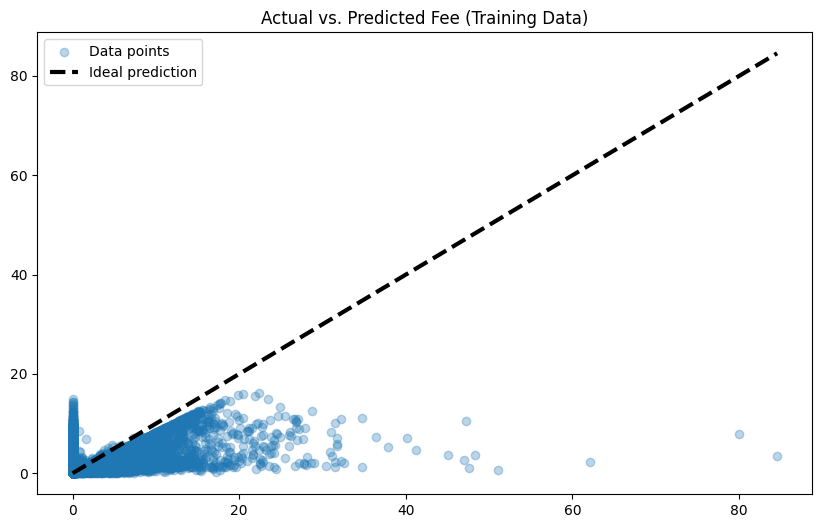

In [118]:
import matplotlib.pyplot as plt

# Use the model to predict the 'Fee' for the training data
y_train_pred = model.predict(X_train)

# Create a scatter plot of the actual vs. predicted 'Fee' for the training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Data points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Ideal prediction')
plt.title('Actual vs. Predicted Fee (Training Data)')
plt.legend()  # Add a legend
plt.show()

In [80]:
# Calculate the correlation between 'Energy (kWh)' and 'Fee'
correlation = data_cleaned['Energy (kWh)'].corr(data_cleaned['Fee'])
correlation_fee_time = data_cleaned['Charging Time (minutes)'].corr(data_cleaned['Fee'])

print(f"Correlation between 'Energy (kWh)' and 'Fee': {correlation}")
print(f"Correlation between 'Charging' and 'Fee': {correlation_fee_time}")

Correlation between 'Energy (kWh)' and 'Fee': 0.6192953214125697
Correlation between 'Charging' and 'Fee': 0.531313942246858


In [81]:
# Get the index of the row with the highest 'Energy (kWh)'
index_max_fee = data_cleaned['Fee'].idxmax()

# Get the row with the highest 'Energy (kWh)'
row_max_fee = data_cleaned.loc[index_max_fee]
print(row_max_fee)

Station Name                       PALO ALTO CA / HIGH #2
MAC Address                           0024:B100:0002:5959
Org Name                               City of Palo Alto 
Start Time Zone                                       PDT
End Date                              2018-04-08 16:15:00
End Time Zone                                         PDT
Transaction Date (Pacific Time)       2018-04-08 16:20:00
Total Duration (hh:mm:ss)                 1 days 20:00:58
Charging Time (hh:mm:ss)                  0 days 03:28:06
Energy (kWh)                                       20.421
GHG Savings (kg)                                    8.577
Gasoline Savings (gallons)                          2.563
Port Type                                         Level 2
Port Number                                             2
Plug Type                                           J1772
EVSE ID                                          174575.0
Address 1                                     528 High St
City          